In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
       BatchNorm2d-2           [-1, 32, 26, 26]              64
              ReLU-3           [-1, 32, 26, 26]               0
         AvgPool2d-4           [-1, 32, 13, 13]               0
            Conv2d-5           [-1, 32, 11, 11]           9,248
       BatchNorm2d-6           [-1, 32, 11, 11]              64
              ReLU-7           [-1, 32, 11, 11]               0
           Dropout-8           [-1, 32, 11, 11]               0
         MaxPool2d-9             [-1, 32, 6, 6]               0
           Conv2d-10             [-1, 16, 4, 4]           4,624
      BatchNorm2d-11             [-1, 16, 4, 4]              32
             ReLU-12             [-1, 16, 4, 4]               0
          Dropout-13             [-1, 16, 4, 4]               0
           Conv2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


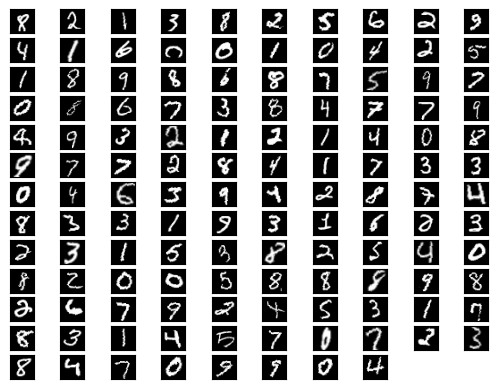

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1395 Batch_id=468 Accuracy=90.16: 100%|██████████| 469/469 [00:25<00:00, 18.21it/s]

[94.69863244977208, 95.59477899733017, 89.07351460221551, 87.88125917468602, 90.7394727832934, 88.34163438479985, 92.91990537343698, 92.03511572226655, 85.3700222184242, 84.01412002017146]


Test set: Average loss: 0.0622, Accuracy: 9830/10000 (98.30%)

[98.57142857142858, 99.38325991189427, 98.15891472868216, 99.10891089108911, 98.37067209775967, 98.76681614349776, 97.91231732776617, 97.66536964980544, 97.5359342915811, 97.42319127849356]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2300 Batch_id=468 Accuracy=96.96: 100%|██████████| 469/469 [00:25<00:00, 18.23it/s]

[98.39608306601384, 98.53159299911005, 95.95501846257133, 96.59109443810145, 96.7819239986306, 97.12230215827337, 98.07367353835755, 96.50438946528332, 95.79559049735089, 95.66313666162381]


Test set: Average loss: 0.0686, Accuracy: 9777/10000 (97.77%)

[99.28571428571429, 99.47136563876651, 97.57751937984496, 99.00990099009901, 96.5376782077393, 98.54260089686099, 98.8517745302714, 99.31906614785993, 91.37577002053389, 97.42319127849356]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0437 Batch_id=468 Accuracy=97.55: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]

[98.59868309978052, 98.72441412043904, 96.94528365223229, 97.42293263741641, 97.22697706264978, 97.71259915144807, 98.3947279486313, 97.23862729449321, 96.71850965646898, 96.3523281223735]


Test set: Average loss: 0.0385, Accuracy: 9894/10000 (98.94%)

[99.59183673469387, 99.03083700440529, 99.90310077519379, 99.3069306930693, 99.69450101832994, 99.43946188340807, 98.32985386221294, 97.85992217898833, 98.4599589322382, 97.81962338949455]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0588 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]

[98.97011649501941, 98.81340848412934, 97.53272910372608, 97.87962811939325, 98.06573091407053, 98.00774764803542, 98.42852314971275, 97.66959297685554, 97.29960690480259, 96.97428139183056]


Test set: Average loss: 0.0364, Accuracy: 9893/10000 (98.93%)

[99.28571428571429, 99.64757709251101, 99.2248062015504, 99.20792079207921, 98.4725050916497, 99.32735426008968, 99.26931106471815, 98.24902723735408, 98.25462012320328, 98.31516352824579]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0203 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:26<00:00, 17.84it/s]

[98.91946648657775, 98.82824087807772, 97.54951325948305, 97.87962811939325, 98.04861348853132, 98.06308799114555, 98.63129435620141, 97.60574620909817, 97.26542471372414, 97.5121869221718]


Test set: Average loss: 0.0337, Accuracy: 9896/10000 (98.96%)

[99.48979591836735, 99.47136563876651, 98.74031007751938, 99.8019801980198, 99.79633401221996, 98.87892376681614, 98.53862212943632, 98.83268482490273, 98.66529774127311, 97.32408325074331]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0279 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]

[99.17271652878608, 98.94690002966479, 97.75092312856664, 98.0101125428152, 97.89455665867854, 98.26600258254935, 98.8340655626901, 97.90901835594573, 97.5217911468125, 97.31047234829383]


Test set: Average loss: 0.0304, Accuracy: 9899/10000 (98.99%)

[99.59183673469387, 99.55947136563876, 99.51550387596899, 99.9009900990099, 99.38900203665987, 98.87892376681614, 98.01670146137788, 98.44357976653697, 97.84394250513347, 98.61248761149653]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0527 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:25<00:00, 18.05it/s]

[99.15583319263887, 98.82824087807772, 97.78449144008057, 98.27108138965912, 97.87743923313934, 98.46891717395314, 98.78337276106794, 98.08459696727854, 97.60724662450862, 97.41132963523282]


Test set: Average loss: 0.0243, Accuracy: 9921/10000 (99.21%)

[99.48979591836735, 99.73568281938327, 99.51550387596899, 99.10891089108911, 99.59266802443992, 99.10313901345292, 98.95615866388309, 98.73540856031128, 98.97330595482546, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0792 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:29<00:00, 15.94it/s]

[99.15583319263887, 99.110056363097, 98.10339039946291, 98.59729244821399, 98.13420061622732, 98.41357683084301, 98.93545116593444, 98.16440542697525, 97.69270210220475, 97.54580601781811]


Test set: Average loss: 0.0248, Accuracy: 9925/10000 (99.25%)

[99.38775510204081, 99.91189427312776, 99.32170542635659, 99.4059405940594, 99.89816700610999, 99.32735426008968, 99.06054279749478, 99.12451361867704, 99.28131416837782, 97.7205153617443]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0358 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:26<00:00, 18.03it/s]

[99.20648320108053, 99.00622960545832, 98.17052702249077, 98.48311857771978, 98.52790140362889, 98.41357683084301, 98.9861439675566, 98.26017557861132, 97.76106648436165, 97.6466633047571]


Test set: Average loss: 0.0245, Accuracy: 9926/10000 (99.26%)

[99.28571428571429, 99.91189427312776, 99.2248062015504, 99.4059405940594, 99.69450101832994, 99.43946188340807, 99.06054279749478, 99.12451361867704, 98.870636550308, 98.51337958374629]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0143 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:28<00:00, 16.42it/s]

[99.2571332095222, 99.18421833283892, 98.53977844914401, 98.61360300114174, 98.4765491270113, 98.54270429809998, 98.96924636701588, 98.32402234636871, 97.91488634421466, 97.88199697428139]


Test set: Average loss: 0.0245, Accuracy: 9918/10000 (99.18%)

[99.6938775510204, 100.0, 98.93410852713178, 99.3069306930693, 99.4908350305499, 98.4304932735426, 98.53862212943632, 98.83268482490273, 99.38398357289527, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0339 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:27<00:00, 17.03it/s]

[99.29089988181666, 99.22871551468407, 98.28801611278952, 98.49942913064753, 98.4765491270113, 98.45047039291643, 99.01993916863805, 98.22825219473265, 97.96615963083234, 97.76433013951925]


Test set: Average loss: 0.0264, Accuracy: 9917/10000 (99.17%)

[99.48979591836735, 99.64757709251101, 99.6124031007752, 99.4059405940594, 99.4908350305499, 99.55156950672645, 99.16492693110646, 99.12451361867704, 98.56262833675564, 97.62140733399404]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0627 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:26<00:00, 17.87it/s]

[99.2571332095222, 99.27321269652923, 98.27123195703255, 98.51573968357528, 98.52790140362889, 98.32134292565947, 99.0537343697195, 98.38786911412609, 98.08579729960691, 97.89880652210455]


Test set: Average loss: 0.0210, Accuracy: 9937/10000 (99.37%)

[99.89795918367346, 99.73568281938327, 99.90310077519379, 99.3069306930693, 99.59266802443992, 99.55156950672645, 98.53862212943632, 99.12451361867704, 99.17864476386036, 98.81070366699703]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0086 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:26<00:00, 18.01it/s]

[99.4766165794361, 99.18421833283892, 98.52299429338704, 98.76039797749144, 98.56213625470728, 98.8009592326139, 99.01993916863805, 98.45171588188349, 98.18834387284225, 98.16775928727517]


Test set: Average loss: 0.0224, Accuracy: 9925/10000 (99.25%)

[99.59183673469387, 99.82378854625551, 99.32170542635659, 99.70297029702971, 98.87983706720978, 98.99103139013454, 98.8517745302714, 99.12451361867704, 99.17864476386036, 98.90981169474728]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0426 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]

[99.39219989869999, 99.30287748442599, 98.5901309164149, 98.90719295384113, 98.5450188291681, 98.76406567054049, 99.20581277458601, 98.46767757382283, 98.20543496838148, 97.91561606992772]


Test set: Average loss: 0.0227, Accuracy: 9924/10000 (99.24%)

[99.79591836734694, 99.91189427312776, 99.4186046511628, 99.3069306930693, 99.59266802443992, 99.2152466367713, 98.8517745302714, 99.22178988326849, 98.870636550308, 98.1169474727453]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0302 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:26<00:00, 17.96it/s]

[99.42596657099443, 99.24354790863245, 98.35515273581738, 98.64622410699722, 98.59637110578568, 98.72717210846707, 98.96924636701588, 98.45171588188349, 98.37634592377371, 98.08371154815936]


Test set: Average loss: 0.0190, Accuracy: 9941/10000 (99.41%)

[99.6938775510204, 99.82378854625551, 99.70930232558139, 99.5049504950495, 99.18533604887983, 99.2152466367713, 99.16492693110646, 99.12451361867704, 99.07597535934292, 99.50445986124876]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0020 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:27<00:00, 17.01it/s]

[99.56103326017221, 99.27321269652923, 98.89224572004028, 99.24971456532377, 98.87024991441288, 98.91163991883415, 99.35789117945252, 98.89864325618515, 98.30798154161681, 98.63842662632375]


Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99.39%)

[99.79591836734694, 100.0, 99.51550387596899, 99.70297029702971, 99.28716904276986, 99.10313901345292, 99.06054279749478, 99.31906614785993, 98.97330595482546, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0141 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:26<00:00, 17.67it/s]

[99.45973324328887, 99.45120142390982, 99.026518966096, 99.13554069482954, 98.88736733995206, 99.09610772920125, 99.39168638053395, 98.88268156424581, 98.73525893009742, 98.5207597915616]


Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99.40%)

[99.79591836734694, 99.91189427312776, 99.6124031007752, 99.60396039603961, 99.4908350305499, 99.10313901345292, 98.95615866388309, 99.31906614785993, 98.97330595482546, 99.10802775024777]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0253 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:27<00:00, 16.93it/s]

[99.52726658787776, 99.3770394541679, 98.87546156428331, 98.8908824009134, 98.97295446764807, 98.96698026194429, 99.29030077728962, 98.85075818036711, 98.71816783455819, 98.45352160026896]


Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

[99.6938775510204, 99.91189427312776, 99.6124031007752, 99.8019801980198, 99.4908350305499, 99.10313901345292, 99.06054279749478, 99.31906614785993, 98.97330595482546, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0404 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:25<00:00, 18.37it/s]

[99.54414992402498, 99.3770394541679, 99.0768714333669, 99.2660251182515, 99.02430674426567, 99.0038738240177, 99.18891517404529, 98.88268156424581, 98.76944112117587, 98.7056648176164]


Test set: Average loss: 0.0178, Accuracy: 9943/10000 (99.43%)

[99.79591836734694, 99.91189427312776, 99.6124031007752, 99.8019801980198, 99.59266802443992, 99.10313901345292, 99.06054279749478, 99.31906614785993, 98.97330595482546, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0560 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:25<00:00, 18.31it/s]

[99.64544994090832, 99.42153663601306, 98.94259818731118, 99.18447235361279, 98.95583704210887, 99.1698948533481, 99.25650557620817, 98.86671987230646, 98.90616988548966, 98.45352160026896]


Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

[99.89795918367346, 99.91189427312776, 99.6124031007752, 99.70297029702971, 99.4908350305499, 99.10313901345292, 98.95615866388309, 99.31906614785993, 98.97330595482546, 99.00891972249752]
Adjusting learning rate of group 0 to 1.0000e-03.


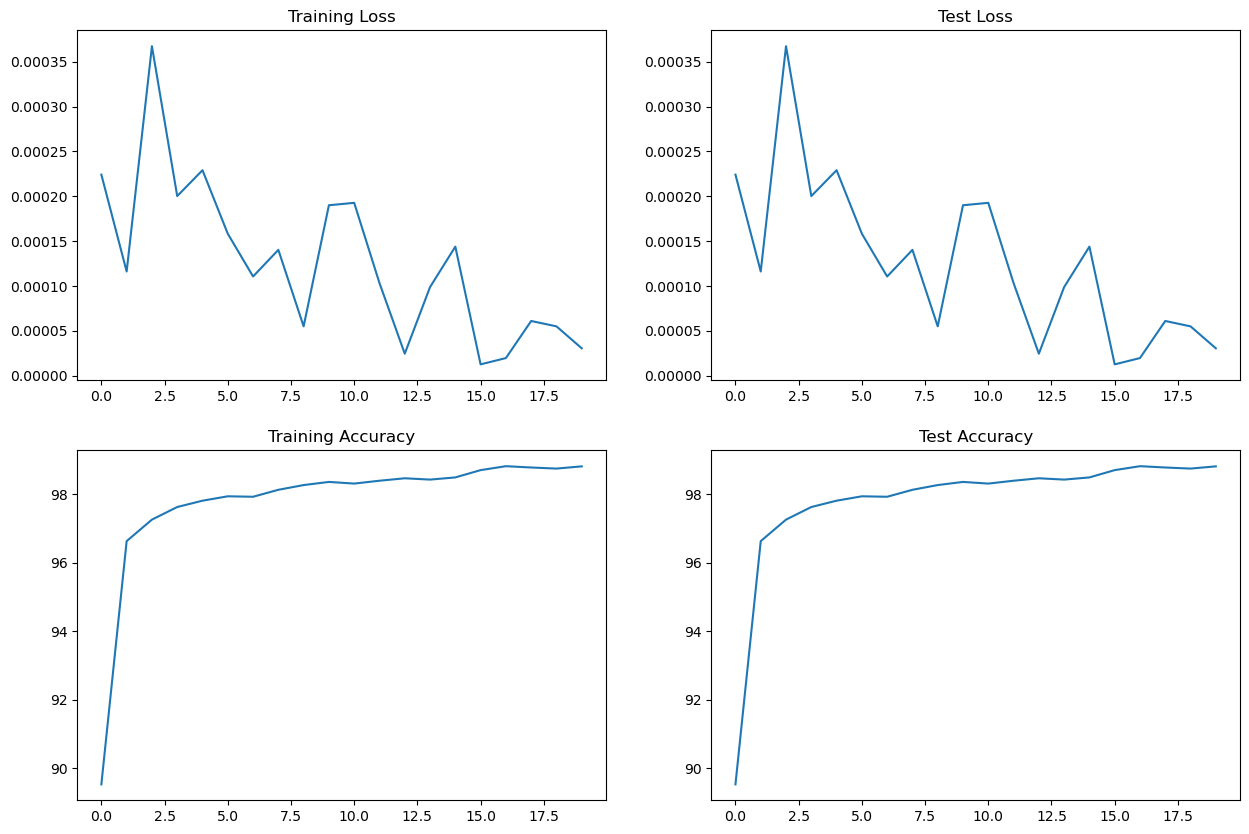

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)